In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning_Topics/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
# We just need last 3 cols
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
df.sample(5)

,Age,EstimatedSalary,Purchased
381,48,33000,1
199,35,22000,0
398,36,33000,0
147,41,30000,0
145,24,89000,0


In [9]:
# Above we can observe that there are 2 independent (Age, Salary) and 1 dependent features (Purchased)
# the range of values of Age and Salary are totally different.
# Values of Age are small and Salary are high

In [10]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

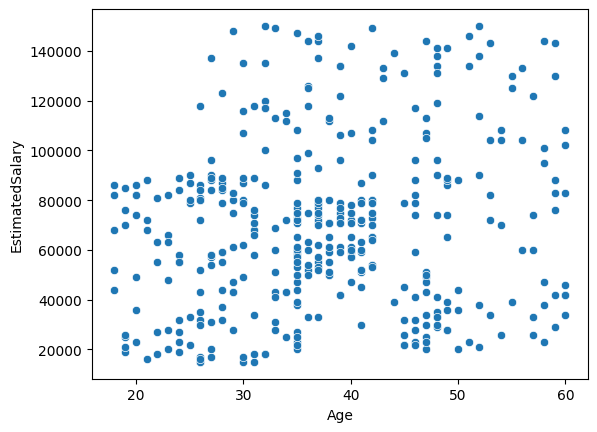

In [12]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

In [13]:
X = df.iloc[:,:2]
y = df.iloc[:, -1]

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Before Scaling

In [19]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 63ms/step - loss: 1110.5316 - accuracy: 0.4969 - val_loss: 782.8430 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 352.3765 - accuracy: 0.6219 - val_loss: 370.8072 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 268.4455 - accuracy: 0.5344 - val_loss: 240.7434 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 164.1630 - accuracy: 0.4281 - val_loss: 127.6929 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 69.2731 - accuracy: 0.5750 - val_loss: 41.1571 - val_accuracy: 0.4000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 28.0972 - accuracy: 0.5969 - val_loss: 55.1716 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 41.7539 - accuracy: 0.5031 - val_loss: 3.2761 - val_acc

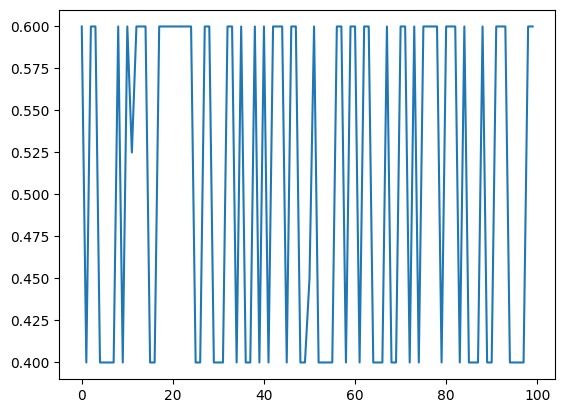

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
# As you can observe above, the accuracy is jumping b/w 40 to 60 and not converging, because of diff sclaes in which Age and Salary are there.

# After Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

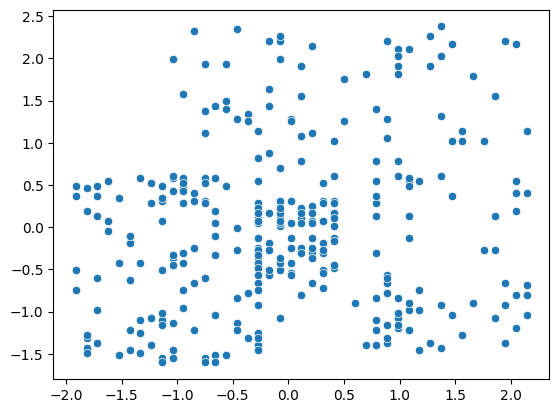

In [31]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [32]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 39ms/step - loss: 0.6864 - accuracy: 0.6031 - val_loss: 0.6569 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6332 - accuracy: 0.7750 - val_loss: 0.6005 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5846 - accuracy: 0.8125 - val_loss: 0.5526 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5439 - accuracy: 0.8250 - val_loss: 0.5115 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5085 - accuracy: 0.8313 - val_loss: 0.4773 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4767 - accuracy: 0.8313 - val_loss: 0.4474 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4487 - accuracy: 0.8469 - val_loss: 0.4217 - val_accuracy: 0.8000
Epoch 8/100

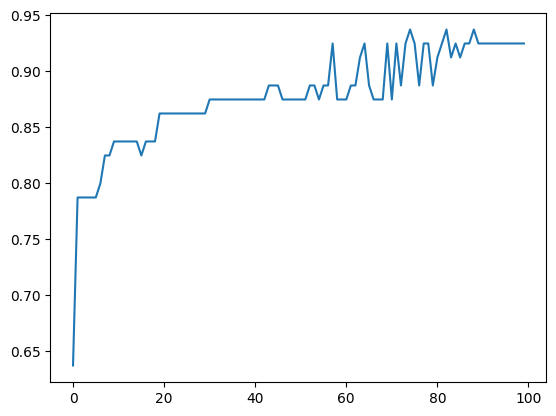

In [35]:
plt.plot(history.history['val_accuracy'])